In [13]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [ ]:

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

sample_image = x_test[0]


In [ ]:

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), name='conv1'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


In [16]:

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:


model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))


Epoch 1/3
1563/1563 [==============================] - 26s 16ms/step - loss: 1.5127 - accuracy: 0.4519 - val_loss: 1.2525 - val_accuracy: 0.5474
Epoch 2/3
1563/1563 [==============================] - 24s 15ms/step - loss: 1.1378 - accuracy: 0.5993 - val_loss: 1.1444 - val_accuracy: 0.5971
Epoch 3/3
1563/1563 [==============================] - 23s 15ms/step - loss: 0.9997 - accuracy: 0.6523 - val_loss: 0.9806 - val_accuracy: 0.6601


In [ ]:

first_conv = model.get_layer('conv1')
weights = first_conv.get_weights()[0]  


In [ ]:

f_min, f_max = weights.min(), weights.max()
filters = (weights - f_min) / (f_max - f_min)


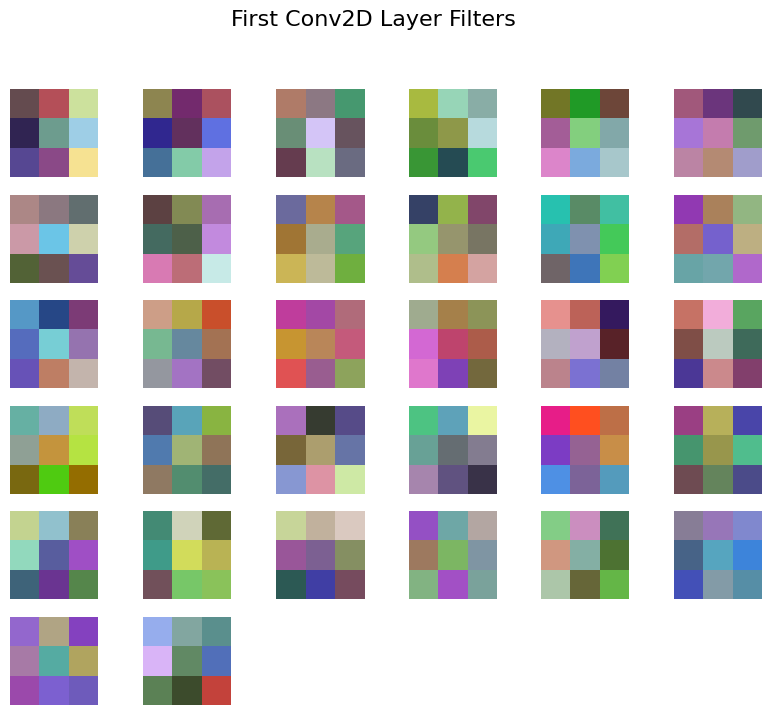

In [ ]:

plt.figure(figsize=(10, 8))
for i in range(32):
    plt.subplot(6, 6, i+1)
    plt.imshow(filters[:, :, :, i])
    plt.axis('off')
plt.suptitle('First Conv2D Layer Filters', fontsize=16)
plt.show()


In [ ]:

feature_map_model = Model(inputs=model.inputs, outputs=model.get_layer('conv1').output)

feature_maps = feature_map_model.predict(np.expand_dims(sample_image, axis=0))


1/1 [==============================] - 0s 73ms/step


Text(0.5, 1.0, 'Original Image')

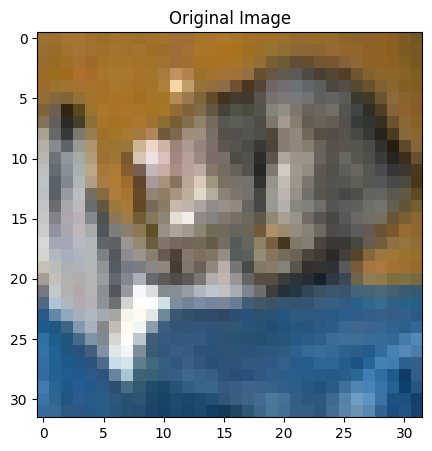

In [22]:

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(sample_image)
plt.title('Original Image')


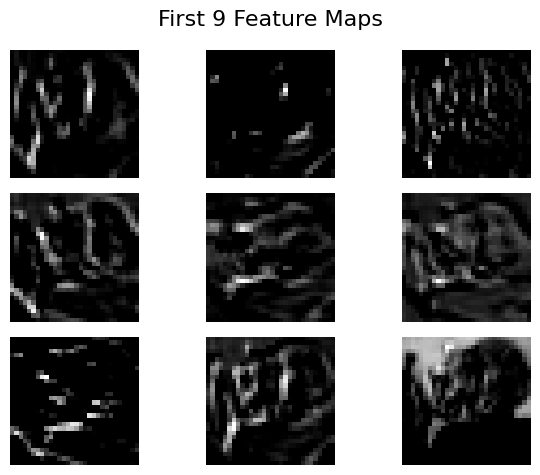

In [ ]:

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(feature_maps[0, :, :, i], cmap='gray')
    plt.axis('off')
plt.suptitle('First 9 Feature Maps', fontsize=16)
plt.tight_layout()
plt.show()